# Лабораторна робота №4 з Видобування даних
## Моделювання
### Мета роботи: навчитися базовому фунукціоналу sckit learn для тренування простих моделей
### В рамках першої лабораторної роботи з етапу моделювання ми будемо працювати з простішими варіантами алгоритмів: [регресія](https://scikit-learn.org/stable/modules/linear_model.html) (може бути на ваш вибір), [дерева рішень](https://scikit-learn.org/stable/modules/tree.html), [ k-nearest neighbours](https://scikit-learn.org/stable/modules/neighbors.html) для класифікації та [k-means](https://scikit-learn.org/stable/modules/clustering.html) для кластеризації. 


### Туторіали по темі : [лінійної регресії](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) , [дерев рішень](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d) , [nearest neighbours](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75) , [k-means](https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c) (якщо стаття перекривається повідомленням відкрийте її в приватній вкладці)

###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame 

In [1]:
### Code starts from here ###
import pandas as pd

url = 'https://raw.githubusercontent.com/AndrewVoisovych/DataMiningLabs/master/understat.com.csv'
dataset = pd.read_csv(url)

dataset = dataset[['сhampionship', 'season','matches','position', 'team', 'wins', 'loses', 'draws', 'scored', 'xG', 'deep', 'deep_allowed' , 'xG_diff', 'missed', 'xGA','pts','xpts', 'xpts_diff']]
dataset = dataset.drop(dataset[dataset['сhampionship'] == 'RFPL'].index)

dataset.head(20)


,сhampionship,season,matches,position,team,wins,loses,draws,scored,xG,deep,deep_allowed,xG_diff,missed,xGA,pts,xpts,xpts_diff
0,La_liga,2014,38,1,Barcelona,30,4,4,110,102.980152,489,114,-7.019848,21,28.444293,94,94.0813,0.0813
1,La_liga,2014,38,2,Real Madrid,30,6,2,118,95.766243,351,153,-22.233757,38,42.607198,92,81.7489,-10.2511
2,La_liga,2014,38,3,Atletico Madrid,23,6,9,67,57.047670,197,123,-9.952330,29,29.069107,78,73.1353,-4.8647
3,La_liga,2014,38,4,Valencia,22,5,11,70,55.062500,203,172,-14.937500,32,39.392572,77,63.7068,-13.2932
4,La_liga,2014,38,5,Sevilla,23,8,7,71,69.526624,305,168,-1.473376,45,47.862742,76,67.3867,-8.6133
5,La_liga,2014,38,6,Villarreal,16,10,12,48,56.767999,242,171,8.767999,37,40.701813,60,62.7363,2.7363
6,La_liga,2014,38,7,Athletic Club,15,13,10,42,45.542151,183,171,3.542151,41,44.106707,55,53.3585,-1.6415
7,La_liga,2014,38,8,Celta Vigo,13,13,12,47,58.887332,287,207,11.887332,44,51.777138,51,55.0488,4.0488
8,La_liga,2014,38,9,Malaga,14,16,8,42,46.221008,184,184,4.221008,48,54.130818,50,48.5128,-1.4872
9,La_liga,2014,38,10,Rayo Vallecano,15,19,4,46,47.790696,147,219,1.790696,68,70.433460,49,43.5455,-5.4545


### 2. Використатйте метод [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) для того щоб отримати набір для тренування і тестування моделі

За допомогою класифікації можна за кількістю очок, визначити яке місце посяде команда. (позиція, 1-20 наприклад)
Регресія дозволяє спрогнозувати можливу кількість набраних очок футбольною командою, на даних щодо всього лиш навісів м’яча у зону 18 метрів (тобто навіть не можливих голах). 

###2.Оберіть 2 методи які би хотіли викорситати для ваших даних - наведіть приклади щоб ви хотіли за допомогою них отримати та аргументуйте чому обрали їх (не конкретний алгоритм а задачу класифікації / кластеризації / регресії )


In [2]:
dataset.describe()

,season,matches,position,wins,loses,draws,scored,xG,deep,deep_allowed,xG_diff,missed,xGA,pts,xpts,xpts_diff
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2016.000000,37.265306,10.316327,13.965306,13.965306,9.334694,50.640816,49.266015,214.897959,214.897959,-1.374801,50.640816,49.266015,51.230612,51.423418,0.192806
std,1.415659,1.550454,5.683537,6.008925,5.585259,2.957473,17.409702,13.843452,85.694431,52.392511,7.198952,13.010204,10.395048,17.162578,13.436106,7.341649
min,2014.000000,34.000000,1.000000,2.000000,1.000000,2.000000,22.000000,26.527059,91.000000,83.000000,-30.963020,17.000000,20.794377,15.000000,25.205500,-24.531500
25%,2015.000000,38.000000,5.000000,10.000000,10.000000,7.000000,38.250000,39.834251,160.000000,176.250000,-5.522751,42.000000,42.673362,39.000000,41.819250,-4.511300
50%,2016.000000,38.000000,10.000000,12.500000,14.000000,9.000000,47.000000,46.184655,190.000000,211.500000,-0.972089,51.000000,48.964268,48.000000,48.791200,0.201900
75%,2017.000000,38.000000,15.000000,17.000000,18.000000,11.000000,58.000000,54.927071,246.000000,252.750000,3.668189,59.000000,55.741148,61.000000,58.992375,4.947125
max,2018.000000,38.000000,20.000000,32.000000,29.000000,18.000000,118.000000,113.598270,582.000000,364.000000,18.148854,94.000000,78.863255,100.000000,94.380000,23.047500


###3.Використайте обидва методи на своїх даних натренувавши модель. Наведіть метрики після тренування на вашх тестових даних
 

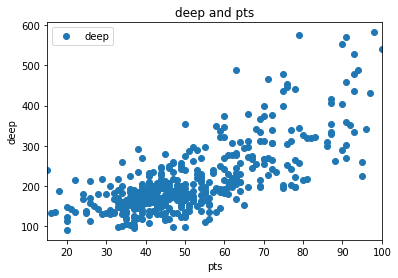

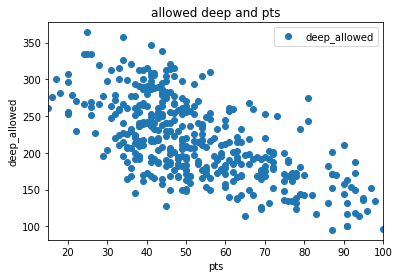

              Coefficient
deep             0.109480
deep_allowed    -0.127127

    Actual  Predicted
0       45  46.640830
1       49  42.681556
2       87  80.090563
3       36  32.091514
4       62  65.880133
5       93  90.054287
6       40  44.359400
7       91  82.629846
8       86  65.855639
9       42  52.365476
10      38  42.826682
11      42  34.874250
12      41  40.574050
13      50  54.663848
14      41  40.403726
15      20  29.492091
16      41  54.586414
17      93  84.703468
18      56  47.756875
19      16  35.622610

Mean Absolute Error: 8.238683119732007
Mean Squared Error: 109.92385844177556
Root Mean Squared Error: 10.484457946969675


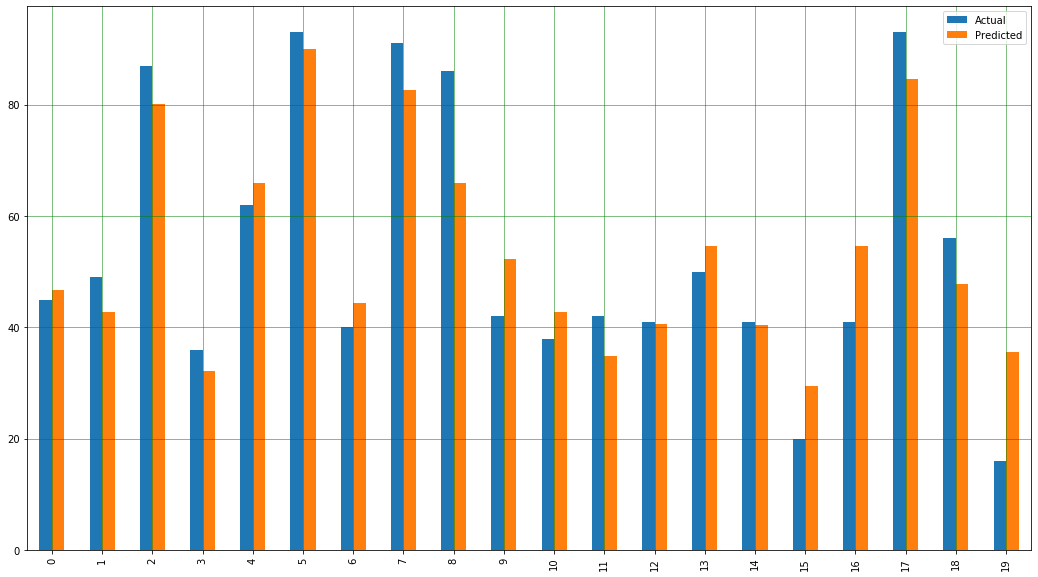

In [31]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.model_selection import train_test_split 

# Graphic dependency between deep and  point
dataset.plot(x='pts', y='deep', style='o')  
plt.title('deep and pts')  
plt.xlabel('pts')  
plt.ylabel('deep')  
plt.show()

# Graphic dependency between point and allowed deep
dataset.plot(x='pts', y='deep_allowed', style='o')  
plt.title('allowed deep and pts')  
plt.xlabel('pts')  
plt.ylabel('deep_allowed')  
plt.show()

X = dataset[['deep', 'deep_allowed']]
y = dataset['pts'].values

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

y_pred = regressor.predict(X_test)

print('');
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(20))

print()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


df.head(20).plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

dataset = dataset[dataset['matches']> 37]

X = dataset[['xpts']]
Y = dataset['position']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

predictt = classifier.predict([[36]])
print("Місце для заданої команди",predictt)

              precision    recall  f1-score   support

           1       0.40      0.33      0.36         6
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         2
           4       0.17      0.50      0.25         2
           5       0.33      0.20      0.25         5
           6       0.50      0.40      0.44         5
           7       0.50      0.40      0.44         5
           8       0.33      0.33      0.33         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         5
          15       0.33      0.10      0.15        10
          16       0.40      0.50      0.44         4
          17       0.33      0.33      0.33         3
          18       0.00    


###4.Чи є можливість покращити метрики змінивши параметри моделі та її параметри тренування ? Або за допомогою зміни / трансформації даних ? Проведіть оновлене тренування де ваші метрики покращаться


In [5]:
X = dataset[['deep', 'deep_allowed', 'xG']]
y = dataset['pts'].values

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 8.577971340219495


###5.Застосуйте вашу модель на одному окремому прикладі з датасету. Що вона вертає у відповідь , що значить даний повернений обєкт або тип ?



In [6]:
regressorPrediction = regressor.predict([[400, 350, 40]])
print("Приклад для команди:", regressorPrediction)

print("Приблизне місце команди:", classifier.predict([regressorPrediction]))


Приклад для команди: [36.12715504]
Приблизне місце команди: [16]
